<a href="https://colab.research.google.com/github/Alaaibrahim2/Alaa/blob/main/Minist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout,Activation

load data set


In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

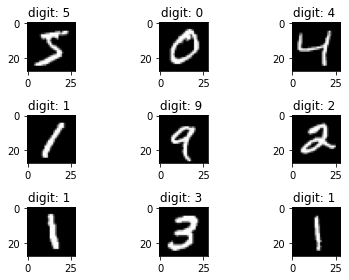

In [ ]:
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i],cmap='gray')
  plt.minorticks_off
  plt.title("digit: {} ".format(y_train[i]))
  

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

normalization

In [ ]:
X_train/=255
X_test/=255

In [ ]:
n_class=10
Y_train=tf.keras.utils.to_categorical(y_train,n_class)
Y_test=tf.keras.utils.to_categorical(y_test,n_class)

Bulding the neuralnetworks


In [ ]:
model=Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0,2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0,2))
model.add(Dense(10))
model.add(Activation('softmax'))



In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
history=model.fit(X_train,Y_train,batch_size=128,epochs=20,verbose=2,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 - 8s - loss: 0.2178 - accuracy: 0.9366 - val_loss: 0.1026 - val_accuracy: 0.9668 - 8s/epoch - 17ms/step
Epoch 2/20
469/469 - 8s - loss: 0.0804 - accuracy: 0.9758 - val_loss: 0.0828 - val_accuracy: 0.9732 - 8s/epoch - 16ms/step
Epoch 3/20
469/469 - 7s - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0653 - val_accuracy: 0.9801 - 7s/epoch - 15ms/step
Epoch 4/20
469/469 - 7s - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.0840 - val_accuracy: 0.9743 - 7s/epoch - 16ms/step
Epoch 5/20
469/469 - 8s - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.0811 - val_accuracy: 0.9777 - 8s/epoch - 16ms/step
Epoch 6/20
469/469 - 7s - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0800 - val_accuracy: 0.9789 - 7s/epoch - 14ms/step
Epoch 7/20
469/469 - 8s - loss: 0.0191 - accuracy: 0.9936 - val_loss: 0.0696 - val_accuracy: 0.9810 - 8s/epoch - 17ms/step
Epoch 8/20
469/469 - 7s - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0935 - val_accuracy: 0.9758 - 7s/epoch - 14ms/step
Epoch 9/20
469/4

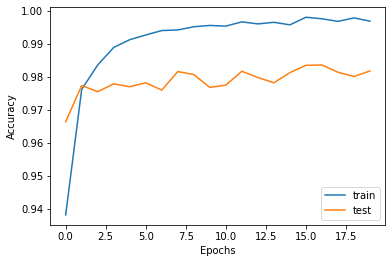

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='lower right')


In [ ]:
loss_and_accuracy=model.evaluate(X_test,Y_test)
print('TEST LOSS',loss_and_accuracy[0])
print('test acc',loss_and_accuracy[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0981 - accuracy: 0.9819
TEST LOSS 0.09805122762918472
test acc 0.9818999767303467


In [ ]:
predict=model.predict(X_test)
max=np.argmax(predict,axis=-1)
max

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
pr=predict[40]
pr

array([9.0218055e-14, 9.9999994e-01, 2.6781851e-12, 5.4264442e-15,
       1.1948078e-09, 1.8043442e-10, 3.2653263e-10, 6.2544134e-09,
       3.4062122e-08, 5.9212394e-14], dtype=float32)

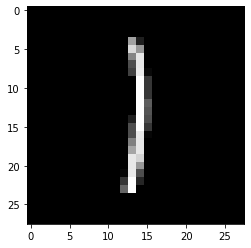

In [ ]:
plt.imshow(X_test[40].reshape(28,28),cmap='gray')

In [ ]:
a=predict[1000]
a

array([4.2654760e-12, 1.0707306e-10, 2.3283968e-13, 9.1182046e-06,
       9.1540830e-10, 6.3872316e-09, 9.0166988e-18, 8.4775117e-08,
       2.9132756e-13, 9.9999076e-01], dtype=float32)

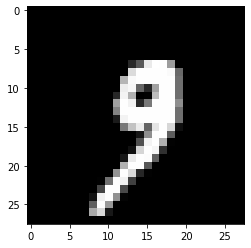

In [ ]:
plt.imshow(X_test[1000].reshape(28,28),cmap='gray')